In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [55]:
#Read the data set
data=pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [56]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [57]:
data.shape

(600, 6)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [59]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [60]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [61]:
data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [62]:
data.tail(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [63]:
data.sample(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
529,NO,Divorced,33116,83388,14,NO


In [64]:
import warnings
warnings.filterwarnings("ignore")

# Data preprocessing

In [65]:
data=data.rename({'Marital.Status':'maritalstatus','Taxable.Income':'taxableincome','City.Population':'citypopulation','Work.Experience':'workexp','Undergrad':'undergrad','Urban':'urban'},axis=1)
data.columns

Index(['undergrad', 'maritalstatus', 'taxableincome', 'citypopulation',
       'workexp', 'urban'],
      dtype='object')

In [66]:
data['maritalstatus'].value_counts()

Single      217
Married     194
Divorced    189
Name: maritalstatus, dtype: int64

In [67]:
data['undergrad'].value_counts()

YES    312
NO     288
Name: undergrad, dtype: int64

In [68]:
data['urban'].value_counts()

YES    302
NO     298
Name: urban, dtype: int64

In [69]:
label_encoder = preprocessing.LabelEncoder()
data['undergrad']= label_encoder.fit_transform(data['undergrad'])
data['urban']= label_encoder.fit_transform(data['urban'])
data['maritalstatus']= label_encoder.fit_transform(data['maritalstatus'])
data.head(1)

,undergrad,maritalstatus,taxableincome,citypopulation,workexp,urban
0,0,2,68833,50047,10,1


In [71]:
data["TaxInc"] = pd.cut(data["taxableincome"], bins = [10002,30000,99620],labels = ["Risky","Good"])
print(data)

     undergrad  maritalstatus  taxableincome  citypopulation  workexp  urban  \
0            0              2          68833           50047       10      1   
1            1              0          33700          134075       18      1   
2            0              1          36925          160205       30      1   
3            1              2          50190          193264       15      1   
4            0              1          81002           27533       28      0   
..         ...            ...            ...             ...      ...    ...   
595          1              0          76340           39492        7      1   
596          1              0          69967           55369        2      1   
597          0              0          47334          154058        0      1   
598          1              1          98592          180083       17      0   
599          0              0          96519          158137       16      0   

    TaxInc  
0     Good  
1     Good  


In [72]:
data = pd.get_dummies(data,columns = ["TaxInc"],drop_first=True)

In [73]:
data.tail(5)

,undergrad,maritalstatus,taxableincome,citypopulation,workexp,urban,TaxInc_Good
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1
599,0,0,96519,158137,16,0,1


# Normalization

In [74]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [75]:
df_norm = norm_func(data.iloc[:,1:])
df_norm.tail(5)

,maritalstatus,taxableincome,citypopulation,workexp,urban,TaxInc_Good
595,0.0,0.740236,0.078811,0.233333,1.0,1.0
596,0.0,0.669122,0.170058,0.066667,1.0,1.0
597,0.0,0.416566,0.737240,0.000000,1.0,1.0
598,0.5,0.988540,0.886810,0.566667,0.0,1.0
599,0.0,0.965408,0.760683,0.533333,0.0,1.0


In [77]:
df_norm["income"]="<=30000"
df_norm.loc[data["taxableincome"]>=30000,"income"]="Good"
df_norm.loc[data["taxableincome"]<=30000,"income"]="Risky"
df_norm

,maritalstatus,taxableincome,citypopulation,workexp,urban,TaxInc_Good,income
0,1.0,0.656468,0.139472,0.333333,1.0,1.0,Good
1,0.0,0.264428,0.622394,0.600000,1.0,1.0,Good
2,0.5,0.300415,0.772568,1.000000,1.0,1.0,Good
3,1.0,0.448436,0.962563,0.500000,1.0,1.0,Good
4,0.5,0.792258,0.010081,0.933333,0.0,1.0,Good
...,...,...,...,...,...,...,...
595,0.0,0.740236,0.078811,0.233333,1.0,1.0,Good
596,0.0,0.669122,0.170058,0.066667,1.0,1.0,Good
597,0.0,0.416566,0.737240,0.000000,1.0,1.0,Good
598,0.5,0.988540,0.886810,0.566667,0.0,1.0,Good


In [78]:
df_norm['income'].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

In [79]:
x = df_norm.drop(['TaxInc_Good','income'], axis=1)
y = df_norm['income']

In [80]:
x

,maritalstatus,taxableincome,citypopulation,workexp,urban
0,1.0,0.656468,0.139472,0.333333,1.0
1,0.0,0.264428,0.622394,0.600000,1.0
2,0.5,0.300415,0.772568,1.000000,1.0
3,1.0,0.448436,0.962563,0.500000,1.0
4,0.5,0.792258,0.010081,0.933333,0.0
...,...,...,...,...,...
595,0.0,0.740236,0.078811,0.233333,1.0
596,0.0,0.669122,0.170058,0.066667,1.0
597,0.0,0.416566,0.737240,0.000000,1.0
598,0.5,0.988540,0.886810,0.566667,0.0


In [81]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: income, Length: 600, dtype: object

# Test Train splitting

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Building Decision Tree Classifier using Entropy Criteria

In [83]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)

In [84]:
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [85]:
#Prediction and computing the accuracy
preds1=model1.predict(x_test)
metrics.accuracy_score(preds1,y_test)

1.0

In [86]:
print(classification_report(y_test,preds1))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        95
       Risky       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [87]:
x.columns

Index(['maritalstatus', 'taxableincome', 'citypopulation', 'workexp', 'urban'], dtype='object')

In [88]:
y.unique()

array(['Good', 'Risky'], dtype=object)

In [89]:
#Predicting on test data
preds1 = model1.predict(x_test)# predicting on test data set 
pd.Series(preds1).value_counts()# getting the count of each category 

Good     95
Risky    25
dtype: int64

In [90]:
pd.crosstab(y_test,preds1)

col_0,Good,Risky
income,,
Good,95,0
Risky,0,25


In [91]:
np.mean(preds1==y_test)

1.0

# Building Decision Tree Classifier using gini Criteria

In [93]:
model2= DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=10)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [94]:
y_train

118    Risky
362    Risky
55     Risky
90      Good
390     Good
       ...  
277     Good
9       Good
359     Good
192     Good
559     Good
Name: income, Length: 480, dtype: object

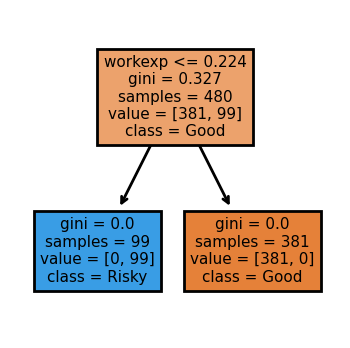

In [95]:
fn=['citypopulation', 'workexp', 'Undergrad_YES', 'maritalstatus_Married',
       'maritalstatus_Single', 'Urban_YES']
cn=['Good', 'Risky']

plt.subplots(figsize = (2,2), dpi=200)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [96]:
#Predicting on test data
preds2 = model2.predict(x_test) # predicting on test data set 
pd.Series(preds2).value_counts() # getting the count of each category 

Good     95
Risky    25
dtype: int64

In [97]:
#Prediction and computing the accuracy
from sklearn import metrics
metrics.accuracy_score(preds2,y_test)

1.0

In [98]:
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        95
       Risky       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [99]:
model2.feature_importances_

array([0., 1., 0., 0., 0.])

# Bagging and Boosting

In [100]:
from sklearn.ensemble import  AdaBoostClassifier,BaggingClassifier

In [101]:
models=[DecisionTreeClassifier(),
        BaggingClassifier(n_estimators=200,max_samples=0.8),
       AdaBoostClassifier(n_estimators=200,random_state=42),
       ]

In [102]:
for model in models:
    model.fit (x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print("===="*20)
    print(classification_report(y_test,pred))

DecisionTreeClassifier()
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        95
       Risky       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

BaggingClassifier(max_samples=0.8, n_estimators=200)
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        95
       Risky       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

AdaBoostClassifier(n_estimators=200, random_state=42)
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        95
       Risky       1.00      1.00      1.00        25

    accuracy                           1.00       